## Google Gemini API 사용하기 (Vertex AI)

---

## Import Package

In [11]:
import os
import io
import http.client
import typing
import urllib.request
import base64
from PIL import Image as PILImage
import matplotlib.pyplot as plt
import vertexai
from vertexai.preview.generative_models import GenerativeModel, Image

## Set Variable

In [12]:
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "/Users/a06790/Documents/gemini-api-408207-21a5f5e43b92.json"

In [7]:
location = "asia-northeast3"
project_id = "gemini-api-408207"

In [8]:
vertexai.init(project=project_id, location=location) 

## Function

In [16]:
def load_and_encode_images(prompts):
    encoded_prompts = []
    prompt_details = []
    image_count = 0  # 이미지 개수 카운터

    for item in prompts:
        prompt_detail = {"prompt": item}

        if item.startswith('http'):  # 이미지 URL인 경우
            response = typing.cast(http.client.HTTPResponse, urllib.request.urlopen(item))
            image_data = response.read()
            pil_image = PILImage.open(io.BytesIO(image_data))
            encoded_image = Image.from_bytes(image_data)
            encoded_prompts.append(encoded_image)
            prompt_detail["type"] = "image"
            prompt_detail["pil_image"] = pil_image
            image_count += 1
        elif item.split('.')[-1].lower() in ['jpg', 'jpeg', 'png']:  # 파일 경로인 경우
            with open(item, "rb") as image_file:
                image_data = image_file.read()
                pil_image = PILImage.open(io.BytesIO(image_data))
                encoded_image = Image.from_bytes(image_data)
                encoded_prompts.append(encoded_image)
                prompt_detail["type"] = "image"
                prompt_detail["pil_image"] = pil_image
                image_count += 1
        else:  # 텍스트인 경우
            encoded_prompts.append(item)
            prompt_detail["type"] = "text"

        prompt_details.append(prompt_detail)

    return encoded_prompts, prompt_details, image_count

def display_response(prompt_details, response_text):
    # 이미지와 텍스트 출력
    for prompt_detail in prompt_details:
        if prompt_detail["type"] == "image":
            plt.imshow(prompt_detail["pil_image"])
            plt.axis('off')
            plt.show()
        print("Prompt: {} (type: {})".format(prompt_detail['prompt'], prompt_detail['type']))

    for candidate in response_text.candidates:
        for part in candidate.content.parts:
            print("Gemini:{}".format(part.text))

def chat_gemini(prompts):
    encoded_prompts, pil_images, image_count = load_and_encode_images(prompts)

    # 이미지 개수에 따라 모델 선택
    if image_count > 0:
        model_name = "gemini-pro-vision"
    else:
        model_name = "gemini-pro"

    # GenerativeModel 객체 생성 및 콘텐츠 생성
    model = GenerativeModel(model_name)
    response = model.generate_content(encoded_prompts)

    print(f"Loaded {image_count} images using the '{model_name}' model.")
    display_response(pil_images, response)


## Extract text from images
Transcribe text from a handwritten note.

Loaded 1 images using the 'gemini-pro-vision' model.


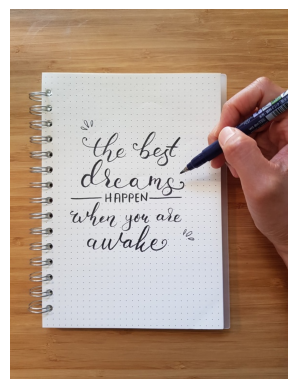

Prompt: asset/images/test_1.png (type: image)
Prompt: Read the text in this image. (type: text)
Gemini:  The best dreams happen when you are awake


In [17]:
prompts = ["asset/images/test_1.png", "Read the text in this image."]
chat_gemini(prompts)

## Few shot image to JSON
Use world knowledge and the provided examples to answer questions.

Loaded 3 images using the 'gemini-pro-vision' model.


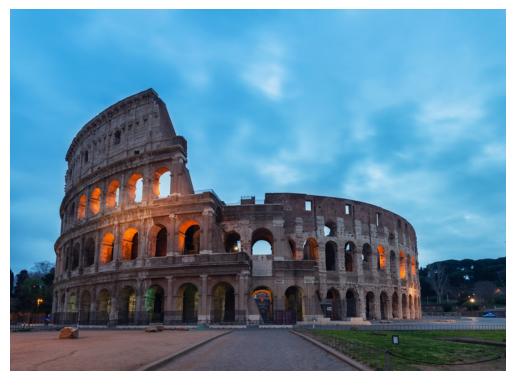

Prompt: asset/images/test_2.png (type: image)
Prompt: city: Rome, Landmark: the Colosseum (type: text)


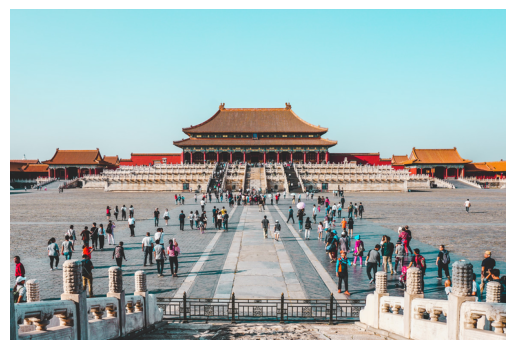

Prompt: asset/images/test_3.png (type: image)
Prompt: city: Beijing, Landmark: Forbidden City (type: text)


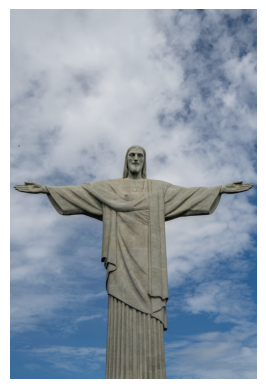

Prompt: asset/images/test_4.png (type: image)
Gemini:  city: Rio de Janeiro, Landmark: Christ the Redeemer


In [18]:
prompts = ["asset/images/test_2.png", "city: Rome, Landmark: the Colosseum",
           "asset/images/test_3.png", "city: Beijing, Landmark: Forbidden City",
           "asset/images/test_4.png",
          ]
chat_gemini(prompts)

## Image question answering
Show the model an image of Brazil nuts and have its price from another image.

Loaded 2 images using the 'gemini-pro-vision' model.


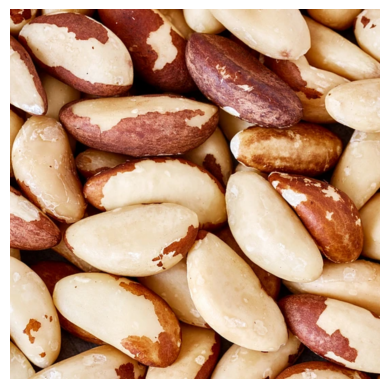

Prompt: asset/images/test_5.png (type: image)


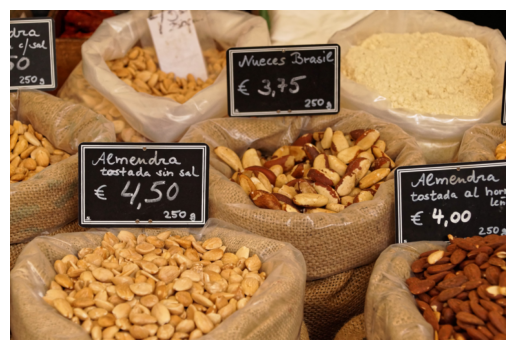

Prompt: asset/images/test_6.png (type: image)
Prompt: What is the price of this? (type: text)
Gemini:  The price is 3.75 euros.


In [19]:
prompts = ["asset/images/test_5.png", "asset/images/test_6.png", 
           "What is the price of this?",
          ]
chat_gemini(prompts)

## Image text to JSON
Extract the items and prices from a fish market photo and output them in JSON.

Loaded 1 images using the 'gemini-pro-vision' model.
Prompt: Extract the items and prices from a fish market photo and output them in JSON. (type: text)


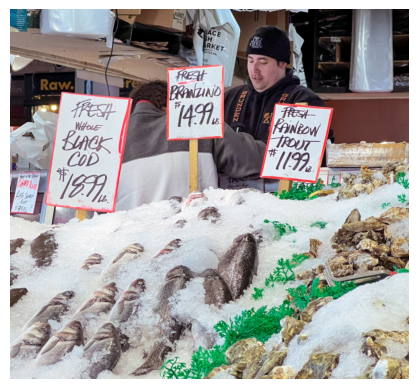

Prompt: asset/images/test_7.png (type: image)
Gemini:  ```json
{
  "items": [
    {
      "name": "Fresh Black Cod",
      "price": 18.99
    },
    {
      "name": "Fresh Branzino",
      "price": 14.99
    },
    {
      "name": "Fresh Rainbow Trout",
      "price": 11.99
    }
  ]
}
```


In [20]:
prompts = ["Extract the items and prices from a fish market photo and output them in JSON.",
           "asset/images/test_7.png",
          ]
chat_gemini(prompts)

## Write story from image
Write a create story based on the image of a dog in the snow wearing ski goggles.

Loaded 1 images using the 'gemini-pro-vision' model.


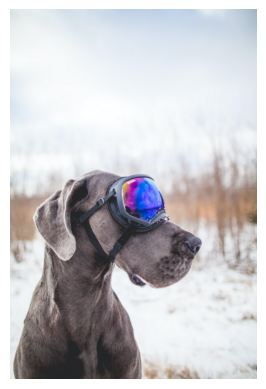

Prompt: asset/images/test_8.png (type: image)
Prompt: Write a creative story inspired by this image (type: text)
Gemini:  A Great Dane named Oakley loved to play in the snow. He would spend hours running around and chasing snowballs. One day, Oakley's owner took him to a new park. Oakley was so excited to explore the new place. He ran around and played in the snow for hours.

Suddenly, Oakley saw a squirrel. He took off after it, barking and chasing it up a tree. The squirrel was too quick for Oakley, and it escaped. Oakley was disappointed, but he didn't give up. He kept looking for the squirrel.

Finally, Oakley saw the squirrel again. This time, he was determined to catch it. He chased the squirrel up a tree, and this time, he was successful. Oakley caught the squirrel and brought it down to the ground. He was so proud of himself.

Oakley's owner was so happy to see him catch the squirrel. He gave Oakley a big hug and a treat. Oakley was so happy. He had a great day playing in the s

In [22]:
prompts = ["asset/images/test_8.png",
           "Write a creative story inspired by this image",
          ]
chat_gemini(prompts)

## More..

Loaded 1 images using the 'gemini-pro-vision' model.


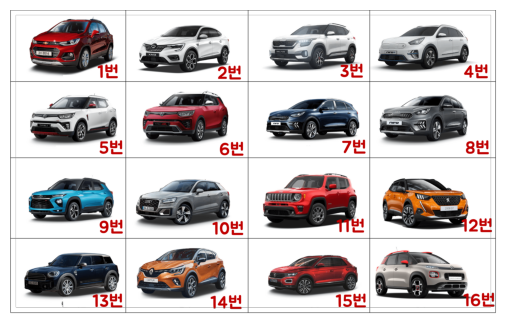

Prompt: asset/images/test_10.png (type: image)
Prompt: Just find the Audi car and tell me the number. (type: text)
Gemini:  The Audi car is number 10.


In [24]:
prompts = ["asset/images/test_9.png",
           "Just find the Audi car and tell me the number.",
          ]
chat_gemini(prompts)

Loaded 1 images using the 'gemini-pro-vision' model.


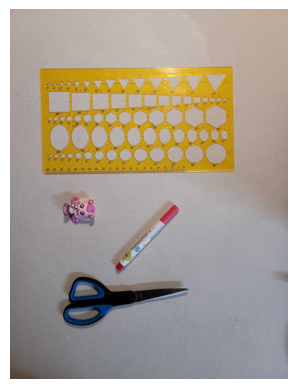

Prompt: asset/images/test_11.png (type: image)
Prompt: Look at the picture and infer the size of the scissors in cm. (type: text)
Gemini:  The scissors are about 15 cm long.


In [26]:
prompts = ["asset/images/test_10.png",
           "Look at the picture and infer the size of the scissors in cm.",
          ]
# 이미지 처리 및 응답 표시
chat_gemini(prompts)

Loaded 1 images using the 'gemini-pro-vision' model.


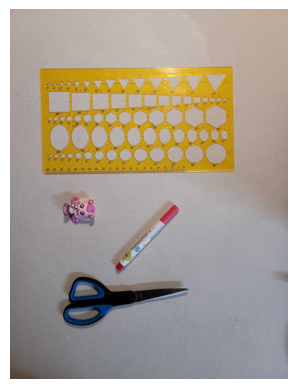

Prompt: asset/images/test_11.png (type: image)
Prompt: Look at the picture and infer the size of the toy in cm. (type: text)
Gemini:  The toy is about 3.5 cm tall. The grid in the background is in centimeters, and the toy is about 7 grid squares tall.


In [27]:
prompts = ["asset/images/test_10.png",
           "Look at the picture and infer the size of the toy in cm.",
          ]
chat_gemini(prompts)